In [1]:
import dlib
import numpy as np

# Example: Extract facial landmarks using dlib
def extract_facial_landmarks(image):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")  # Download this file

    faces = detector(image, 1)

    if len(faces) == 0:
        return None, False  # No face detected

    shape = predictor(image, faces[0])
    landmarks = np.array([[p.x, p.y] for p in shape.parts()])

    return landmarks,True

import warnings
warnings.filterwarnings('ignore')

## Implementation

In [2]:
indeces = {0:'heart',1:'oblong',2:'oval',3:'round',4:'square'}

In [3]:
import cv2
import matplotlib.pyplot as plt
import pickle

marks_points = {2 : 0, 14 : 1, 69 : 2, 75 : 3, 79 : 4, 72 : 5, 8 : 6, 12 : 7, 4 : 8, 6 : 9, 10 : 10, 7 : 11, 9 : 12}

marks = []
labels = []

In [4]:
# for i in range(5):
#     for j in range(1,30):
#         path = f'{i}/{indeces[i]} (' + str(j) + ').jpg'
#         image = cv2.imread(path)
#         landmarks = extract_facial_landmarks(image)
#         marks.append([landmarks[x] for x in marks_points])
#         labels.append(i)

In [5]:
# import pickle

# # Save landmarks to a pickle file
# with open('landmarks.pkl', 'wb') as file:
#     pickle.dump(marks, file)

In [6]:
## loading the file

In [7]:
with open('landmarks.pkl', 'rb') as file:
    marks = pickle.load(file)

In [8]:
with open('labels.pkl', 'rb') as file:
    labels = pickle.load(file)

In [9]:
import numpy as np
np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# calculating the distances

## euclidean distance

In [10]:
import math

In [11]:
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [12]:
def get_distances(landmarks):
    d1 = distance(landmarks[marks_points[2]], landmarks[marks_points[14]])
    d2 = distance(landmarks[marks_points[75]], landmarks[marks_points[79]])
    d3 = distance(((landmarks[marks_points[69]][0] +  landmarks[marks_points[72]][0])/2,(landmarks[marks_points[69]][1] + landmarks[marks_points[72]][1])/2), landmarks[marks_points[8]])
    d4 = distance(landmarks[marks_points[8]], landmarks[marks_points[12]])
    d5 = distance(landmarks[marks_points[4]], landmarks[marks_points[12]])
    d6 = distance(landmarks[marks_points[6]], landmarks[marks_points[10]])
    d7 = distance(landmarks[marks_points[7]], landmarks[marks_points[9]])
    return [d1, d2, d3, d4,d5, d6,d7]

In [13]:
def get_ratios(distances):
    r1=  distances[1] / distances[0]
    r2 = distances[0] / distances[2]
    r3 = distances[1] / distances[2]
    r4 = distances[0] / distances[4]
    r5 = distances[5] / distances[4]
    r6 = distances[3] / distances[5]
    r7 = distances[5] / distances[0]
    r8 = distances[4] / distances[1]
    r9 = distances[3] / distances[4]
    r10 = distances[6] / distances[5]
    
    return [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10]

In [14]:
def slope(p1, p2):
    return (p2[1] - p1[1]) / (p2[0] - p1[0])

In [15]:
def angle(m1, m2):
    value = abs((m1 - m2) / (1 + (m1*m2)))
    return math.degrees(math.atan(value))

In [16]:
def get_angles(landmarks):
    a1 = angle(-slope(landmarks[marks_points[69]], landmarks[marks_points[72]]), slope(landmarks[marks_points[8]], landmarks[marks_points[10]]))
    a2 = angle(-slope(landmarks[marks_points[69]], landmarks[marks_points[72]]), slope(landmarks[marks_points[8]], landmarks[marks_points[12]]))
    a3 = angle(slope(landmarks[marks_points[2]], landmarks[marks_points[14]]), slope(landmarks[marks_points[14]], landmarks[marks_points[12]]))
    
    return [a1, a2, a3]

In [17]:
distances = []
ratios = []
angles = []
for x in range(len(marks)):
    try:
        angles.append(get_angles(marks[x]))
    except FloatingPointError:
        labels.pop(x)
        continue
    distances.append(get_distances(marks[x]))
    ratios.append(get_ratios(distances[-1]))

In [18]:
angles = np.array(angles)
ratios = np.array(ratios)
distances = np.array(distances)

In [19]:
angles

array([[ 9.27873601, 21.63409588, 74.69020977],
       [36.70285503, 47.09594277, 70.40771811],
       [23.30226557, 35.92769339, 72.85238012],
       ...,
       [19.23137834, 32.96816924, 76.95741958],
       [21.87339491, 35.841645  , 77.5561573 ],
       [26.56505118, 39.93638315, 76.38498683]])

In [20]:
ratios

array([[0.93113791, 0.75446645, 0.70251232, ..., 0.9172224 , 0.66497419,
        0.53146436],
       [0.89168154, 0.7405728 , 0.66035509, ..., 0.92430763, 0.68651003,
        0.52944234],
       [0.95646563, 0.71763733, 0.68639544, ..., 0.85742196, 0.64392092,
        0.53658537],
       ...,
       [0.95007482, 0.81753647, 0.77672082, ..., 0.91737747, 0.61851099,
        0.52826777],
       [0.92371763, 0.76904321, 0.71037877, ..., 0.94561195, 0.60841982,
        0.5203252 ],
       [0.96122908, 0.78862715, 0.75805135, ..., 0.89207079, 0.58388476,
        0.53690975]])

In [21]:
distances

array([[129.98846103, 121.03718437, 172.29190347, ..., 111.01801656,
         62.80127387,  33.37663854],
       [156.81836627, 139.83204211, 211.752804  , ..., 129.24782397,
         70.11419257,  37.12142239],
       [ 89.02246907,  85.14693183, 124.04938533, ...,  73.00684899,
         41.        ,  22.        ],
       ...,
       [179.04468716, 170.1058494 , 219.00513693, ..., 156.05127363,
         89.05054744,  47.04253395],
       [245.00816313, 226.31835984, 318.58829231, ..., 214.00934559,
        123.        ,  64.        ],
       [224.02008838, 215.33462332, 284.06337321, ..., 192.09372712,
        108.04165863,  58.00862005]])

In [22]:
distances.shape

(2490, 7)

In [23]:
ratios.shape

(2490, 10)

In [24]:
angles.shape

(2490, 3)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
distances_scaled = scaler.fit_transform(distances)
ratios_scaled = scaler.fit_transform(ratios)
angles_scaled = scaler.fit_transform(angles)

In [26]:
distances_scaled

array([[-0.71999715, -0.70638962, -0.72804396, ..., -0.71547964,
        -0.72027551, -0.71052018],
       [-0.5765683 , -0.5958087 , -0.5670571 , ..., -0.6012751 ,
        -0.63985188, -0.63188241],
       [-0.93899552, -0.91755255, -0.9248568 , ..., -0.95360877,
        -0.96003444, -0.9494214 ],
       ...,
       [-0.45774955, -0.41769054, -0.53747008, ..., -0.43335913,
        -0.43159983, -0.4235462 ],
       [-0.10511819, -0.08696011, -0.13120514, ..., -0.07026834,
        -0.05824163, -0.06745162],
       [-0.21731745, -0.15158373, -0.2720549 , ..., -0.20756344,
        -0.22274559, -0.19326629]])

In [27]:
angles_scaled

array([[-1.58191734, -1.58890136,  0.32335431],
       [ 1.35777634,  1.06302282, -1.75756689],
       [-0.07868286, -0.1001823 , -0.56967222],
       ...,
       [-0.51505646, -0.4084252 ,  1.42502253],
       [-0.23184884, -0.10914448,  1.71595737],
       [ 0.2710673 ,  0.31733421,  1.14686964]])

In [28]:
ratios_scaled

array([[ 0.62508771,  0.01786128,  0.35909202, ..., -0.46830617,
         1.29762283,  0.81826239],
       [-0.66936085, -0.33394134, -0.64594754, ..., -0.26328223,
         1.86188435,  0.59587082],
       [ 1.45601615, -0.91469271, -0.02513876, ..., -2.19873876,
         0.74600515,  1.38149806],
       ...,
       [ 1.24635246,  1.6148636 ,  2.12824257, ..., -0.46381892,
         0.08023862,  0.4666849 ],
       [ 0.38164986,  0.38696085,  0.5466304 , ...,  0.35319623,
        -0.18416074, -0.40688017],
       [ 1.61229108,  0.88284774,  1.6831574 , ..., -1.19611295,
        -0.8270049 ,  1.41717566]])

In [29]:
all_features = np.concatenate((distances_scaled, ratios_scaled, angles_scaled), axis=1)

In [30]:
all_features

array([[-0.71999715, -0.70638962, -0.72804396, ..., -1.58191734,
        -1.58890136,  0.32335431],
       [-0.5765683 , -0.5958087 , -0.5670571 , ...,  1.35777634,
         1.06302282, -1.75756689],
       [-0.93899552, -0.91755255, -0.9248568 , ..., -0.07868286,
        -0.1001823 , -0.56967222],
       ...,
       [-0.45774955, -0.41769054, -0.53747008, ..., -0.51505646,
        -0.4084252 ,  1.42502253],
       [-0.10511819, -0.08696011, -0.13120514, ..., -0.23184884,
        -0.10914448,  1.71595737],
       [-0.21731745, -0.15158373, -0.2720549 , ...,  0.2710673 ,
         0.31733421,  1.14686964]])

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
all_features = pca.fit_transform(all_features)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(all_features, labels, random_state=42, test_size=0.2)
y_test = np.array(y_test)
y_train = np.array(y_train)
x_train = np.array(x_train)
x_test = np.array(x_test)

In [34]:
from sklearn.cluster import KMeans

k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_train)

KMeans(n_clusters=5, random_state=42)

In [35]:
import pickle

# Save landmarks to a pickle file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [36]:
predictions = kmeans.predict(x_test)

In [37]:
predictions

array([1, 1, 4, 1, 4, 1, 4, 4, 0, 2, 1, 3, 3, 1, 1, 4, 1, 1, 1, 4, 3, 3,
       1, 0, 3, 2, 3, 4, 3, 1, 2, 2, 2, 4, 1, 3, 1, 1, 1, 4, 1, 1, 1, 0,
       2, 1, 3, 2, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 2, 4, 1, 1, 1, 1, 4, 3,
       2, 4, 3, 0, 2, 2, 2, 3, 3, 1, 3, 1, 4, 1, 4, 1, 1, 4, 4, 1, 3, 3,
       0, 2, 2, 1, 1, 2, 3, 2, 1, 3, 1, 4, 2, 0, 1, 2, 1, 2, 4, 1, 4, 4,
       1, 2, 2, 4, 1, 0, 0, 2, 1, 1, 2, 3, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 4, 2, 1, 1, 1, 1, 3, 4, 4, 1, 4, 2, 2, 4, 1, 1, 1, 2, 3,
       0, 2, 4, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 4, 1, 3, 1, 3, 4, 1, 1, 4,
       3, 2, 2, 1, 0, 2, 2, 4, 4, 1, 1, 1, 3, 1, 1, 4, 0, 4, 3, 2, 3, 3,
       2, 2, 0, 3, 1, 1, 2, 3, 1, 1, 4, 1, 3, 3, 2, 2, 3, 2, 3, 2, 3, 1,
       4, 1, 2, 0, 1, 1, 1, 4, 1, 1, 4, 3, 2, 4, 2, 4, 1, 1, 1, 4, 3, 1,
       2, 3, 1, 3, 3, 0, 4, 1, 2, 2, 4, 1, 1, 2, 1, 4, 3, 2, 2, 2, 4, 3,
       3, 1, 1, 1, 4, 4, 4, 1, 3, 1, 2, 4, 4, 1, 4, 3, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 0, 2, 3, 1, 4, 2, 4, 0, 1, 2, 2, 1,

In [38]:
kmeans.inertia_

5306.0924548224375

In [39]:
# from scipy.stats import mode

# def assign_labels_to_clusters(true_labels, clusters):
#     unique_clusters = np.unique(clusters)
#     assigned_labels = []

#     for cluster in unique_clusters:
#         cluster_indices = np.where(clusters == cluster)[0]
#         cluster_true_labels = true_labels[cluster_indices]
#         most_common_label = mode(cluster_true_labels)[0]
#         assigned_labels.append([cluster, most_common_label])

#     return dict(assigned_labels)

# classes = assign_labels_to_clusters(y_test, predictions)

In [40]:
classes = {0: 3, 1: 2, 2: 4, 3: 1, 4: 0}

In [41]:
ps = [classes[p] for p in predictions]

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, ps)

0.28112449799196787

## Cluster Plotting

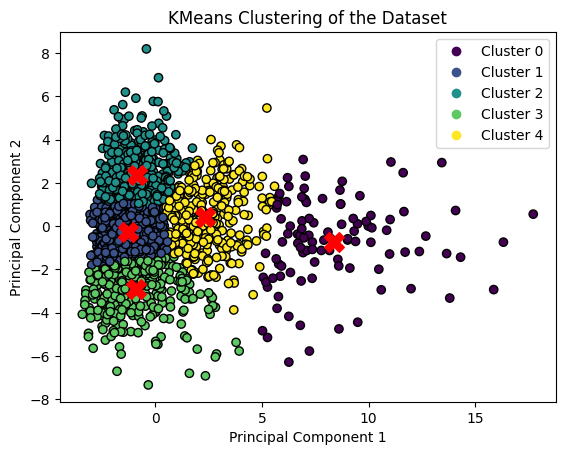

In [44]:
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=kmeans.labels_, edgecolor='k', cmap='viridis')
legend_labels = [f'Cluster {i}' for i in range(kmeans.n_clusters)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of the Dataset')
plt.show()

## Analysis

## Loss Curve

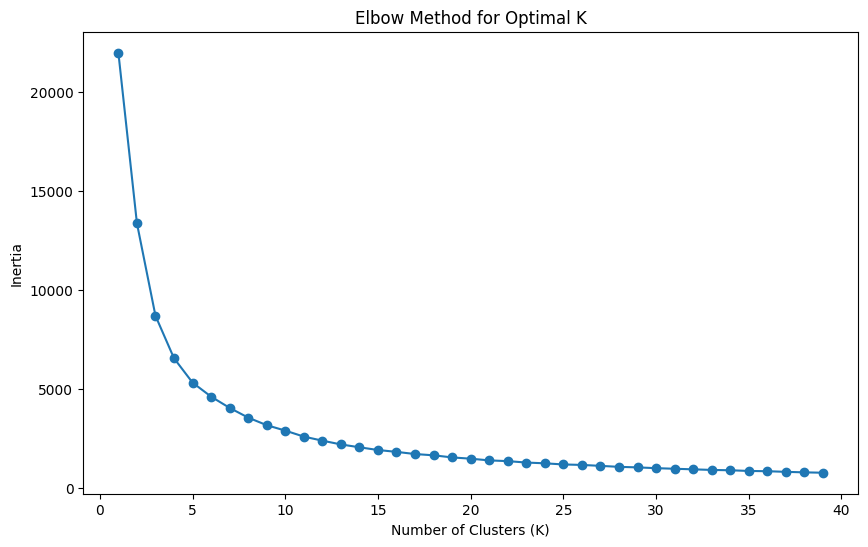

In [45]:
import matplotlib.pyplot as plt

inertia_values = []

for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

## Performance metrics

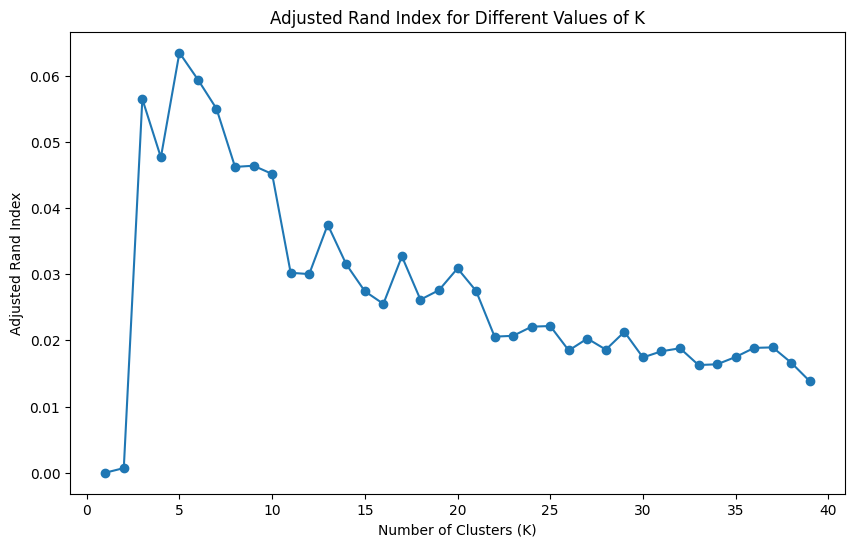

In [46]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'true_labels' is the ground truth labels
# Assuming 'k_values' is a list of candidate values for k (number of clusters)

ari_scores = []

for k in range(1,40):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(x_test)
    ari_scores.append(adjusted_rand_score(y_test, clusters))

# Plotting ARI scores
plt.figure(figsize=(10, 6))
plt.plot(range(1,40), ari_scores, marker='o')
plt.title('Adjusted Rand Index for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Adjusted Rand Index')
plt.show()

## Hyperparameter Tuning

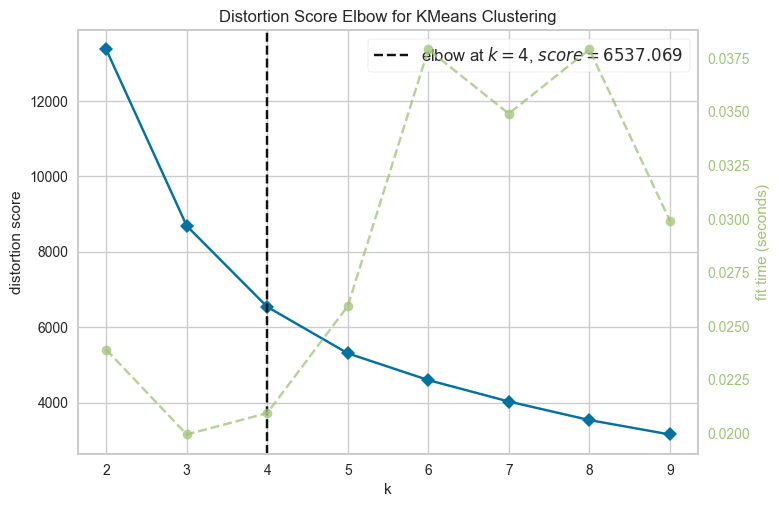

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(x_train)  # X is your data
visualizer.show()